In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
city_data=pd.read_csv('Resources/city_data.csv')
city_data

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [5]:
city_data.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
city_data.isna().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
city_data.duplicated().sum()

0

In [8]:
ride_data=pd.read_csv('Resources/ride_data.csv')
ride_data

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12
4,South Jack,3/6/19 4:28,34.58,3.908450e+12
...,...,...,...,...
2370,Michaelberg,4/29/19 17:04,13.38,8.550370e+12
2371,Lake Latoyabury,1/30/19 0:05,20.76,9.018730e+12
2372,North Jaime,2/10/19 21:03,11.11,2.781340e+12
2373,West Heather,5/7/19 19:22,44.94,4.256850e+12


In [9]:
ride_data.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [10]:
ride_data['ride_id']=ride_data['ride_id'].astype(int)

In [11]:
ride_data.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [12]:
pyber_data_df=pd.merge(ride_data, city_data, on='city', how='left')
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/19 4:28,34.58,3908450000000,46,Urban
5,South Latoya,3/11/19 12:26,9.52,1995000000000,10,Urban
6,New Paulville,2/27/19 11:17,43.25,793208000000,44,Urban
7,Simpsonburgh,4/26/19 0:43,35.98,111954000000,21,Urban
8,South Karenland,1/8/19 3:28,35.09,7995620000000,4,Urban
9,North Jasmine,3/9/19 6:26,42.81,5327640000000,33,Urban


In [13]:
pyber_data_df.type.unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [15]:
urban_cities_df=pyber_data_df[pyber_data_df['type']=='Urban']
suburban_cities_df=pyber_data_df[pyber_data_df['type']=='Suburban']
rural_cities_df=pyber_data_df[pyber_data_df['type']=='Rural']

In [17]:
urban_ride_count=urban_cities_df.groupby('city').count()['ride_id']
suburban_ride_count=suburban_cities_df.groupby('city').count()['ride_id']
rural_ride_count=rural_cities_df.groupby('city').count()['ride_id']

In [18]:
urban_avg_fare=urban_cities_df.groupby('city').mean()['fare']
suburban_avg_fare=suburban_cities_df.groupby('city').mean()['fare']
rural_avg_fare=rural_cities_df.groupby('city').mean()['fare']

In [19]:
urban_driver_count=urban_cities_df.groupby('city').mean()['driver_count']
suburban_driver_count=suburban_cities_df.groupby('city').mean()['driver_count']
rural_driver_count=rural_cities_df.groupby('city').mean()['driver_count']

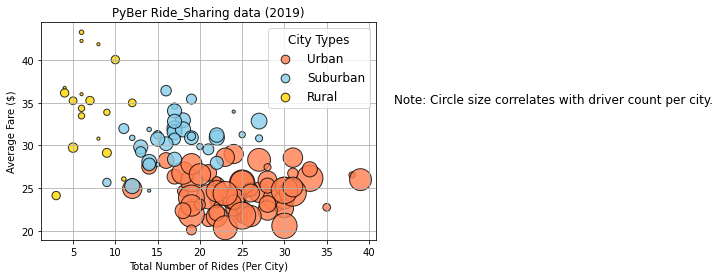

In [40]:

plt.scatter(urban_ride_count, urban_avg_fare, color='coral', edgecolor='black', alpha=0.8, label='Urban',
           s=10*urban_driver_count, linewidth=1)

plt.scatter(suburban_ride_count, suburban_avg_fare, color='skyblue', edgecolor='black', alpha=0.8, label='Suburban',
           s=10*suburban_driver_count, linewidth=1)

plt.scatter(rural_ride_count, rural_avg_fare, color='gold', edgecolor='black', alpha=0.8, label='Rural',
           s=10*rural_driver_count, linewidth=1)

plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('PyBer Ride_Sharing data (2019)')
plt.grid()

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(43, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
plt.savefig('Analysis/Fig1.png',bbox_inches='tight')
plt.show()